# Decision tree- Classification task - Fraud data 

Treat those who have taxable_income <= 30000 as "Risky" and others are "Good"

|Feature| Description|
|:----|:----|
|Undergrad|person is under graduated or not|
|Marital.Status|marital status of a person|
|Taxable.Income|Taxable income is the amount of how much tax an individual owes to the government| 
|Work Experience|Work experience of an individual person|
|Urban|Whether that person belongs to urban area or not|


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [59]:
df = pd.read_csv('Fraud_check.csv')
df.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [60]:
df.loc[df['Taxable.Income']<=30000,'Taxable.Income'] = 0
df.loc[df['Taxable.Income']>30000,'Taxable.Income'] = 1

df['Undergrad'] = df['Undergrad'].map({'NO':0, 'YES':1})
df['Urban'] = df['Urban'].map({'NO':0, 'YES':1})

df1 = pd.get_dummies(df['Marital.Status'],drop_first=True)
df = df.drop(columns='Marital.Status')
df = pd.concat([df,df1],axis=1)
df.head()

,Undergrad,Taxable.Income,City.Population,Work.Experience,Urban,Married,Single
0,0,1,50047,10,1,0,1
1,1,1,134075,18,1,0,0
2,0,1,160205,30,1,1,0
3,1,1,193264,15,1,0,1
4,0,1,27533,28,0,1,0


In [11]:
df.duplicated().sum()

0

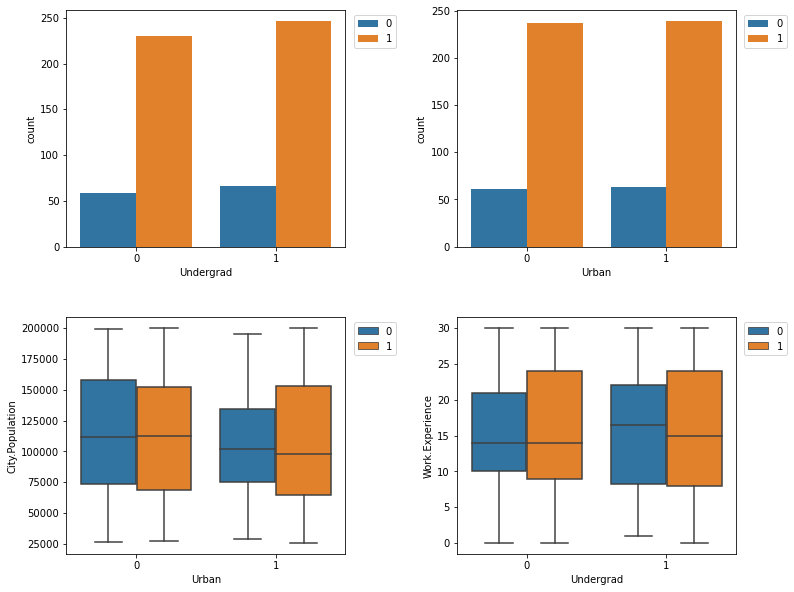

In [57]:
fig,axes = plt.subplots(2,2,figsize=(12,10))
plt.subplots_adjust(wspace=0.4,hspace=0.3)

sns.countplot(data=df, x='Undergrad',hue='Taxable.Income',ax=axes[0][0])
axes[0][0].legend(bbox_to_anchor=(1.2,1));

sns.countplot(data=df, x='Urban',hue='Taxable.Income',ax=axes[0][1])
axes[0][1].legend(bbox_to_anchor=(1.2,1));

sns.boxplot(data=df,x='Urban',y='City.Population',hue='Taxable.Income',ax=axes[1][0])
axes[1][0].legend(bbox_to_anchor=(1.2,1));

sns.boxplot(data=df,x='Undergrad',y='Work.Experience',hue='Taxable.Income',ax=axes[1][1])
axes[1][1].legend(bbox_to_anchor=(1.2,1));

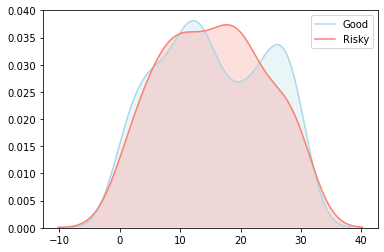

In [29]:
ax = sns.kdeplot(data=df.loc[df['Taxable.Income']==1,'Work.Experience'],shade=True,color='lightblue',label='Good')
ax = sns.kdeplot(data=df.loc[df['Taxable.Income']==0,'Work.Experience'],shade=True,color='Salmon',label='Risky');

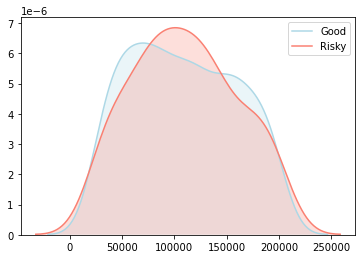

In [31]:
ax = sns.kdeplot(data=df.loc[df['Taxable.Income']==1,'City.Population'],shade=True,color='lightblue',label='Good')
ax = sns.kdeplot(data=df.loc[df['Taxable.Income']==0,'City.Population'],shade=True,color='Salmon',label='Risky');

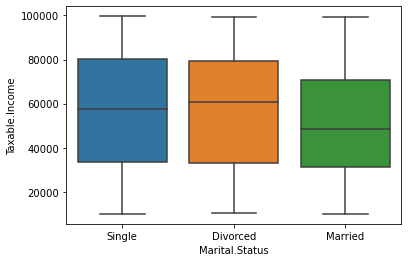

In [37]:
sns.boxplot(data=df,x='Marital.Status',y='Taxable.Income');

In [62]:
X = df.drop(columns='Taxable.Income')
y = df['Taxable.Income']

In [63]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [66]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
model = DecisionTreeClassifier()
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [67]:
from sklearn.metrics import classification_report, plot_confusion_matrix
print(classification_report(y_test,model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.20      0.22      0.21        37
           1       0.79      0.77      0.78       143

    accuracy                           0.66       180
   macro avg       0.49      0.49      0.49       180
weighted avg       0.67      0.66      0.66       180



In [70]:
model2 = DecisionTreeClassifier(criterion='entropy')
model2.fit(X_train,y_train)
print(classification_report(y_test,model2.predict(X_test)))

              precision    recall  f1-score   support

           0       0.16      0.19      0.17        37
           1       0.78      0.73      0.76       143

    accuracy                           0.62       180
   macro avg       0.47      0.46      0.46       180
weighted avg       0.65      0.62      0.64       180



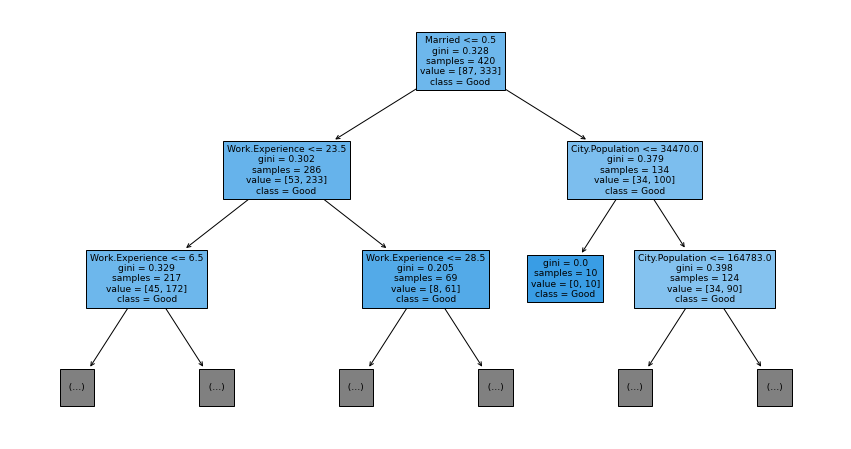

In [75]:
plt.figure(figsize=(15,8))
plot_tree(model,max_depth=2,filled=True,class_names=['Risky','Good'],feature_names=X_train.columns);

# Thank you!

In [77]:
df.to_csv('Fraud_check_modified.csv',index=False)